Import needed libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\Matthew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\inspection\__init__.py)

# Data Exploration

In [37]:
#Load the Dataset
data = pd.read_csv("Churn_Modelling.csv")

#Display the first few Rows
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [38]:
#print statistics
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [5]:
#check for missing values
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Its obvious we are working with optomised data, most datasets in the realworld are not this "clean" for lack of a better word

# Exploratory Data Analysis

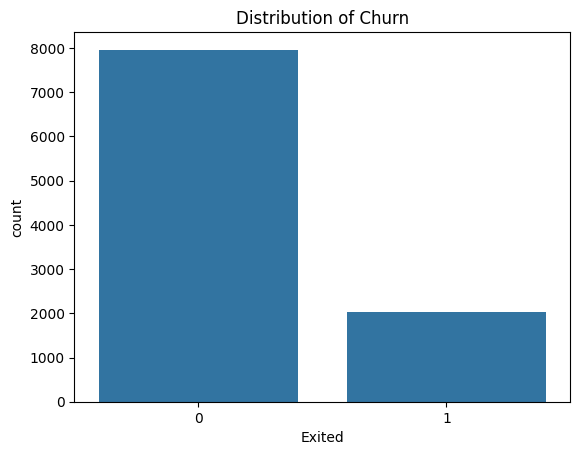

In [6]:
#Visualize the distribution of exited
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Churn')
plt.show()

In [7]:
#Display the first few Rows
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

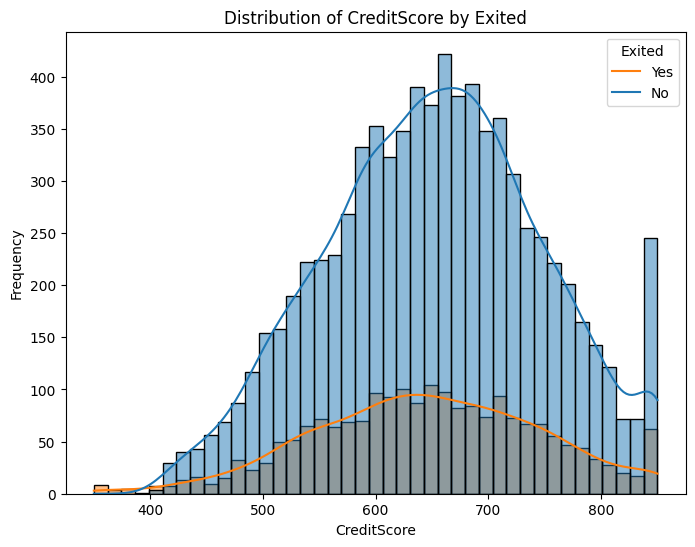

Descriptive Statistics for CreditScore:
         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0




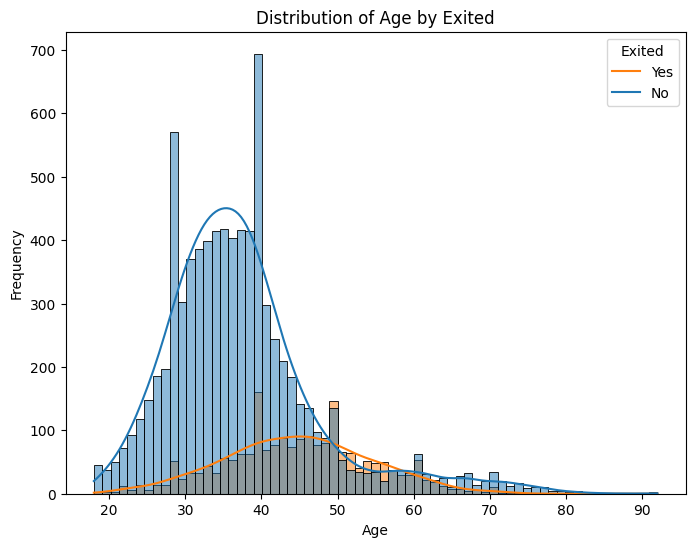

Descriptive Statistics for Age:
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0




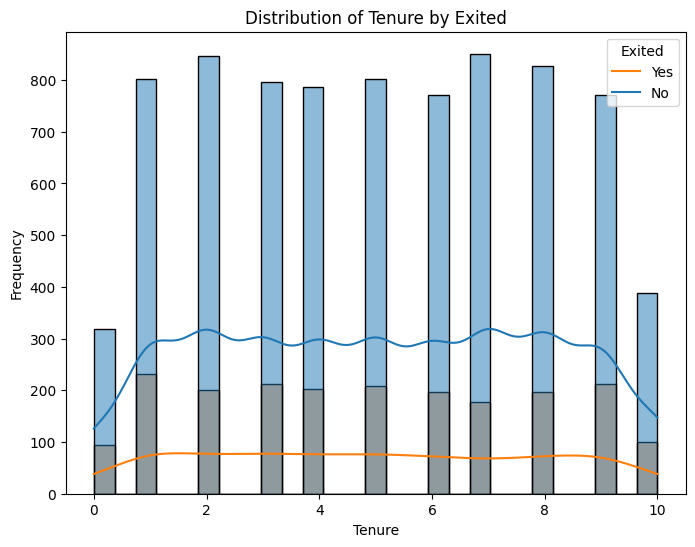

Descriptive Statistics for Tenure:
         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0




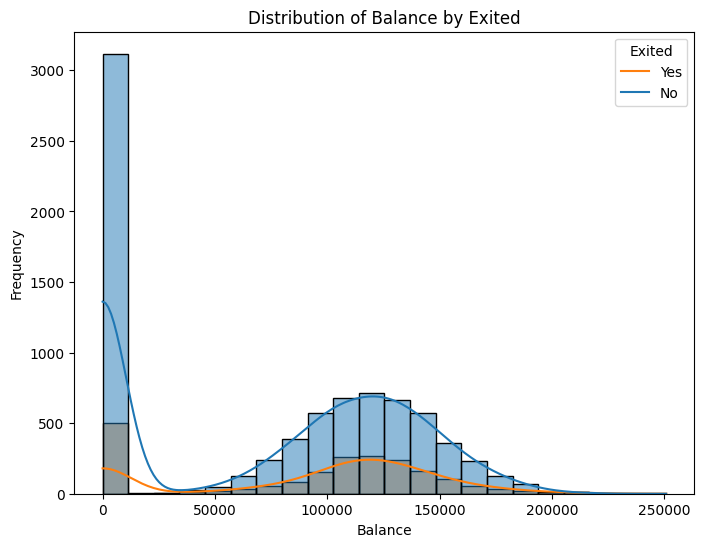

Descriptive Statistics for Balance:
         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  




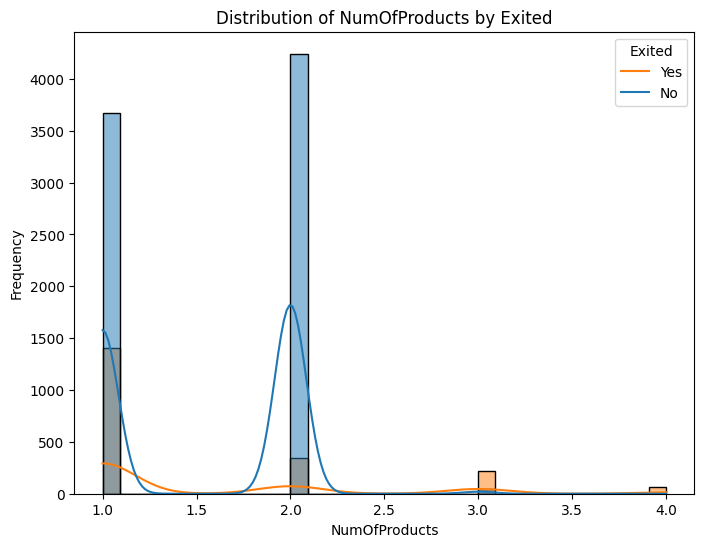

Descriptive Statistics for NumOfProducts:
         count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7963.0  1.544267  0.509536  1.0  1.0  2.0  2.0  3.0
1       2037.0  1.475209  0.801521  1.0  1.0  1.0  2.0  4.0




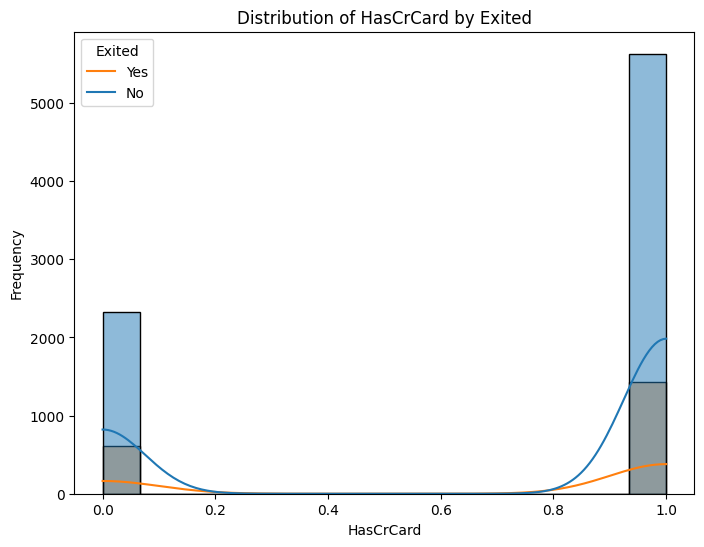

Descriptive Statistics for HasCrCard:
         count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7963.0  0.707146  0.455101  0.0  0.0  1.0  1.0  1.0
1       2037.0  0.699067  0.458776  0.0  0.0  1.0  1.0  1.0




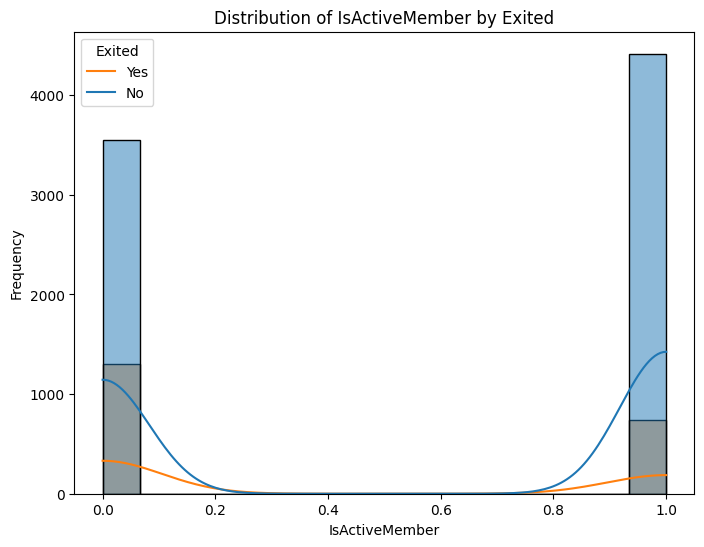

Descriptive Statistics for IsActiveMember:
         count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7963.0  0.554565  0.497045  0.0  0.0  1.0  1.0  1.0
1       2037.0  0.360825  0.480358  0.0  0.0  0.0  1.0  1.0




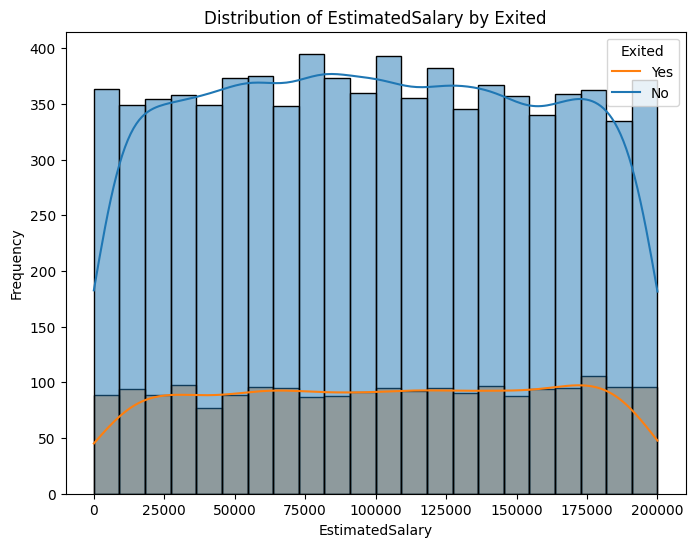

Descriptive Statistics for EstimatedSalary:
         count           mean           std    min       25%        50%  \
Exited                                                                    
0       7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148609.955  199992.48  
1       152422.910  199808.10  




In [11]:
target_column = 'Exited'

#create a list of all numeric features besides our goal feature "exited"
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

for feature_column in numeric_features:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data, x=feature_column, hue=target_column, kde=True)
    plt.title(f'Distribution of {feature_column} by {target_column}')
    plt.xlabel(feature_column)
    plt.ylabel('Frequency')
    plt.legend(['Yes','No'],title=target_column)
    plt.show()

    # Analyze descriptive statistics
    print(f"Descriptive Statistics for {feature_column}:")
    print(data.groupby(target_column)[feature_column].describe())
    print("\n")


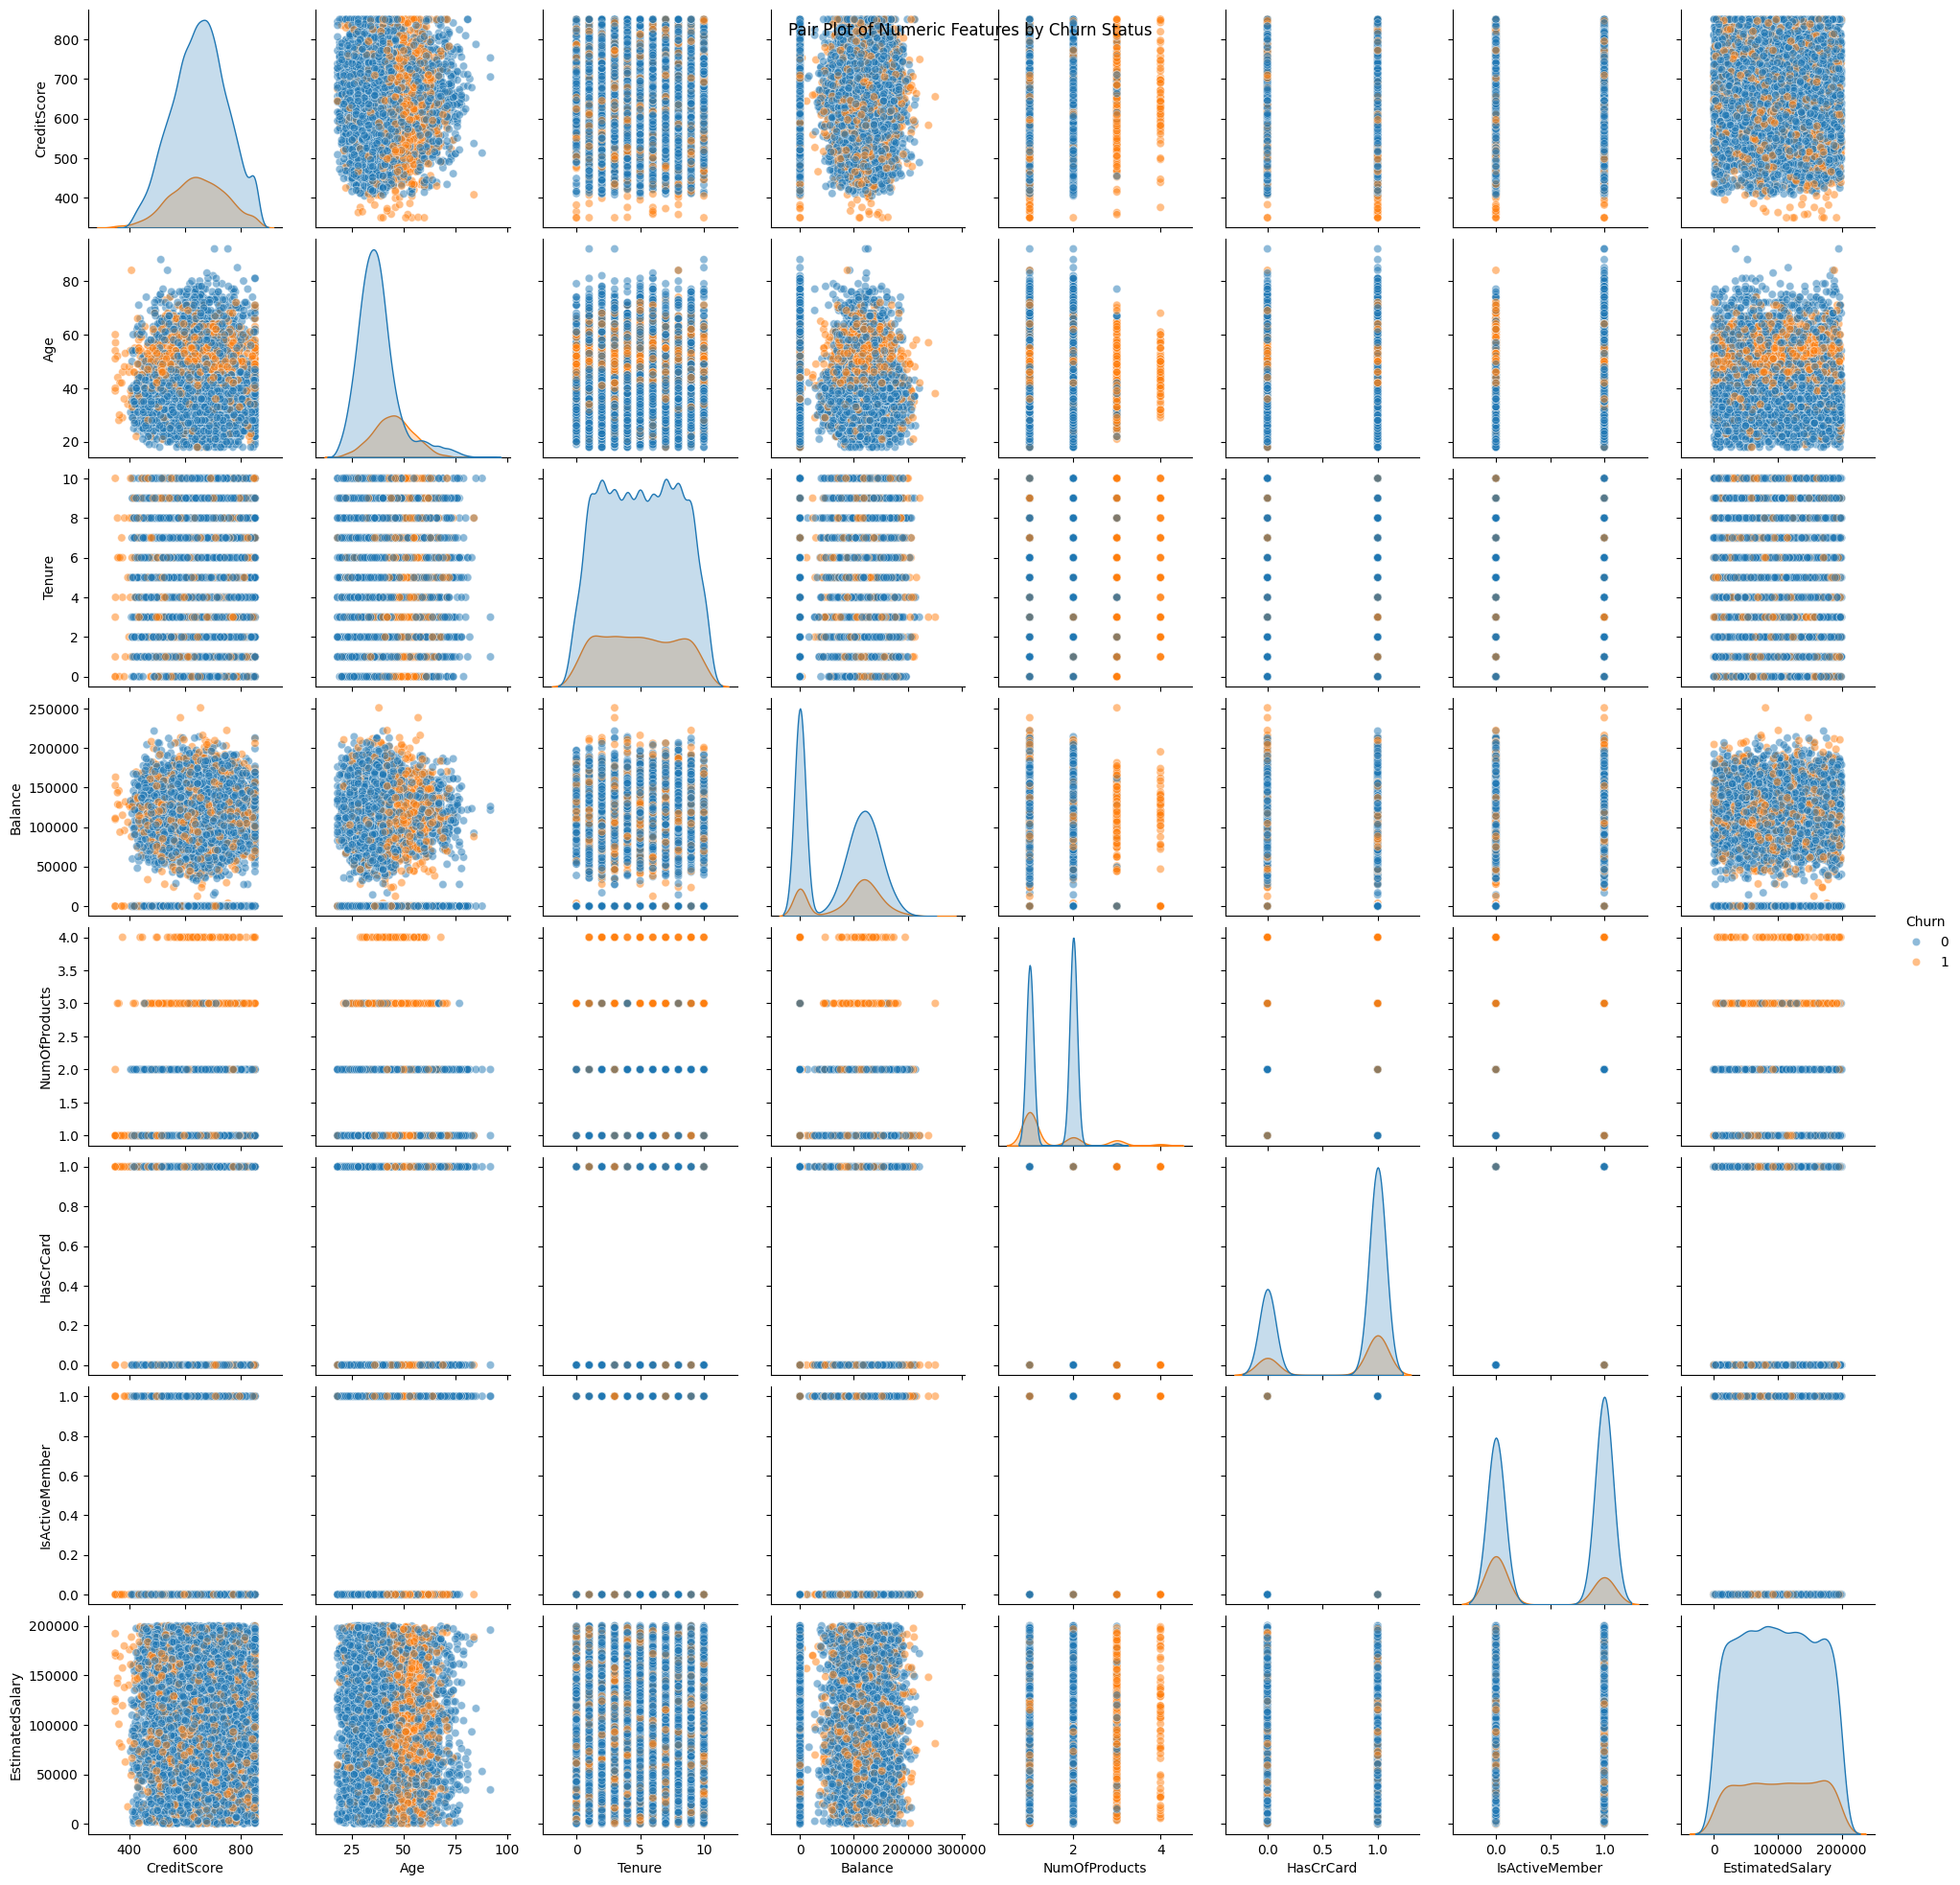

In [8]:
#Create a copy of the data
pairplot_data = data.copy()
pairplot_data['Churn'] = pairplot_data['Exited'] #Rename Exited to Churn
pairplot_data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Exited'], inplace=True) #Remove unnecessary columns

#Create the pair plot
sns.pairplot(pairplot_data, hue='Churn', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numeric Features by Churn Status')
plt.show()

# Feature Engineering

In [28]:
#preform one-hot endocing on geography, the one categorical piece of data i believe is significant
data_encoded = pd.get_dummies(data, columns=['Geography'])

In [29]:
print(data_encoded.head())

   RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619  Female   42       2   
1          2    15647311      Hill          608  Female   41       1   
2          3    15619304      Onio          502  Female   42       8   
3          4    15701354      Boni          699  Female   39       1   
4          5    15737888  Mitchell          850  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_France  Geography_Germany  Geography_Spain  
0       1              True              False    

In [30]:
data_encoded = data_encoded.drop(columns=['RowNumber','CustomerId','Surname', 'Gender'])

In [33]:
print(data_encoded.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1              True   
1               1        112542.58       0             False   
2               0        113931.57       1              True   
3               0         93826.63       0              True   
4               1         79084.10       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2              False            False  
3              False            False  
4     

In [34]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop(columns=['Exited']), data_encoded['Exited'], test_size=0.2, random_state=42)

In [35]:
#Scale Features

#Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)


In [39]:
#Feature Selection

# Initialize the feature selector
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector to the training data
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Transform the test data
X_test_selected = selector.transform(X_test_scaled)

In [69]:
print(selector.get_support())

[ True  True  True  True  True False  True  True  True  True  True]


In [70]:
print(X_train.head())

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9254          686   32       6       0.00              2          1   
1561          632   42       4  119624.60              2          1   
1670          559   24       3  114739.92              1          1   
6087          561   27       9  135637.00              1          1   
6669          517   56       9  142147.32              1          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
9254               1        179093.26              True              False   
1561               1        195978.86             False               True   
1670               0         85891.02             False              False   
6087               0        153080.40              True              False   
6669               0         39488.04              True              False   

      Geography_Spain  
9254            False  
1561            False  
1670             True  
6087    

# Model Evalutaion and Training

In [42]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_selected)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.61      0.19      0.29       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000



In [51]:
# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10, 100]}

# Initialize the grid search
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [55]:
# Initalize the best model
best_model = LogisticRegression(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train_selected, y_train)

LogisticRegression(C=0.1)

In [56]:
# Make predictions on the test data
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.62      0.19      0.29       393

    accuracy                           0.82      2000
   macro avg       0.73      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000



# Model Interpretation

In [ ]:
best_model.

In [72]:
print(X_train.head())

X_train_removed_feature = X_train.drop(columns=['HasCrCard'])

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9254          686   32       6       0.00              2          1   
1561          632   42       4  119624.60              2          1   
1670          559   24       3  114739.92              1          1   
6087          561   27       9  135637.00              1          1   
6669          517   56       9  142147.32              1          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
9254               1        179093.26              True              False   
1561               1        195978.86             False               True   
1670               0         85891.02             False              False   
6087               0        153080.40              True              False   
6669               0         39488.04              True              False   

      Geography_Spain  
9254            False  
1561            False  
1670             True  
6087    

In [73]:
print(X_train_removed_feature.head())
feature_X_train_removed_feature.columns()

      CreditScore  Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
9254          686   32       6       0.00              2               1   
1561          632   42       4  119624.60              2               1   
1670          559   24       3  114739.92              1               0   
6087          561   27       9  135637.00              1               0   
6669          517   56       9  142147.32              1               0   

      EstimatedSalary  Geography_France  Geography_Germany  Geography_Spain  
9254        179093.26              True              False            False  
1561        195978.86             False               True            False  
1670         85891.02             False              False             True  
6087        153080.40              True              False            False  
6669         39488.04              True              False            False  


In [74]:
# Find feature Coefficients
feature_importance = pd.DataFrame({'Feature': X_train_removed_feature.columns, 'Coefficent': best_model.coef_[0]})
feature_importance.sort_values(by='Coefficent', ascending=False, inplace=True)
print(feature_importance)

             Feature  Coefficent
1                Age    0.748351
8  Geography_Germany    0.226089
3            Balance    0.151066
6    EstimatedSalary    0.020164
2             Tenure   -0.045996
4      NumOfProducts   -0.054839
0        CreditScore   -0.063134
9    Geography_Spain   -0.076489
7   Geography_France   -0.129970
5     IsActiveMember   -0.530028


In [78]:
# Get the Index of the feature you want to examine (Default is Credit Score (0))
feature_index = 2

# Get predicted probabilities for test data
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

# Create a DataFrame with predicted probabilities and actual labels
results = pd.DataFrame({'Actual': y_test, 'Predicted_Probability': y_pred_proba})

# Compare predicted probabilities for different groups (e.g., high vs. low credit score)
results.groupby(pd.qcut(X_test_selected[:, feature_index], q=10)).mean()

C:\Users\Matthew\AppData\Local\Temp\ipykernel_23200\660373430.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results.groupby(pd.qcut(X_test_selected[:, feature_index], q=10)).mean()


,Actual,Predicted_Probability
"(-1.7369999999999999, -1.389]",0.190000,0.208080
"(-1.389, -1.042]",0.205882,0.218811
"(-1.042, -0.695]",0.168269,0.198490
"(-0.695, -0.348]",0.263441,0.219749
"(-0.348, -0.00134]",0.256831,0.225691
"(-0.00134, 0.346]",0.200000,0.180651
"(0.346, 0.693]",0.117347,0.167516
"(0.693, 1.04]",0.190909,0.207304
"(1.04, 1.387]",0.189815,0.217749
"(1.387, 1.734]",0.195876,0.196588
